In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [3]:
df = pd.read_csv('heart.csv')

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.groupby('target').size()

target
0    499
1    526
dtype: int64

In [4]:
X = df.values[:, :13]
Y = df.values[:, 13]

In [5]:
t_size = 0.2
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=t_size, random_state=seed)

In [8]:
acc = []
for i in range(1, 251):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    acc.append(accuracy_score(predictions, Y_test))
acc

[0.9804878048780488,
 0.9414634146341463,
 0.9024390243902439,
 0.8,
 0.7463414634146341,
 0.7219512195121951,
 0.7317073170731707,
 0.7268292682926829,
 0.7414634146341463,
 0.7463414634146341,
 0.7121951219512195,
 0.7170731707317073,
 0.7170731707317073,
 0.7121951219512195,
 0.7463414634146341,
 0.7414634146341463,
 0.7317073170731707,
 0.7024390243902439,
 0.6829268292682927,
 0.6780487804878049,
 0.6731707317073171,
 0.6829268292682927,
 0.7268292682926829,
 0.7268292682926829,
 0.7463414634146341,
 0.7317073170731707,
 0.7317073170731707,
 0.7365853658536585,
 0.7365853658536585,
 0.7317073170731707,
 0.7317073170731707,
 0.7219512195121951,
 0.7170731707317073,
 0.7170731707317073,
 0.7170731707317073,
 0.7073170731707317,
 0.7170731707317073,
 0.7073170731707317,
 0.697560975609756,
 0.697560975609756,
 0.7024390243902439,
 0.7121951219512195,
 0.7121951219512195,
 0.7073170731707317,
 0.7073170731707317,
 0.697560975609756,
 0.697560975609756,
 0.6829268292682927,
 0.68780487

In [11]:
print("Max: ",max(acc))
print("Min: ",min(acc))

Max:  0.9804878048780488
Min:  0.6439024390243903


# Q2

In [15]:
acc = []
t_size = 0.2
for i in range(1, 11):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=t_size, random_state=i)
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, Y_train)
    acc.append(accuracy_score(Y_test, knn.predict(X_test)))
display(acc)
print("Max: ", max(acc))
print("Min: ", min(acc))

[0.9512195121951219,
 0.9512195121951219,
 0.9560975609756097,
 0.9560975609756097,
 0.9365853658536586,
 0.975609756097561,
 0.9414634146341463,
 0.926829268292683,
 0.9512195121951219,
 0.9073170731707317]

Max:  0.975609756097561
Min:  0.9073170731707317


# Q3

In [20]:
df = pd.read_csv('derma.csv')

df

,Unnamed: 0,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
0,0,2,2,0,3,0,0,0,0,1,...,0,0,3,0,0,0,1,0,55.0,2
1,1,3,3,3,2,1,0,0,0,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,2,1,2,3,1,3,0,3,0,...,0,2,3,2,0,0,2,3,26.0,3
3,3,2,2,2,0,0,0,0,0,3,...,3,0,0,0,0,0,3,0,40.0,1
4,4,2,3,2,2,2,2,0,2,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,361,2,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,362,3,2,1,0,1,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,363,3,2,2,2,3,2,0,2,0,...,0,3,0,3,0,0,2,3,28.0,3
364,364,2,1,3,1,2,3,0,2,0,...,0,2,0,1,0,0,2,3,50.0,3


In [21]:
df = df.dropna()

X = df.values[:, :35]
Y = df.values[:, 35]


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test);
confusion_mat = confusion_matrix(Y_test, predictions)
accuracy = accuracy_score(Y_test, predictions)

kf = KFold(10, shuffle=True, random_state=42)
cv_score = cross_val_score(knn, X, Y, cv=kf, scoring="accuracy")

display(confusion_mat)
display(accuracy)
display("CV Score: ", cv_score)

array([[23,  5,  2,  1,  0,  0],
       [11,  5,  2,  1,  2,  0],
       [ 6,  5,  8,  1,  0,  0],
       [ 7,  4,  0,  3,  0,  0],
       [ 8,  5,  0,  2,  2,  0],
       [ 3,  0,  0,  0,  0,  2]])

0.39814814814814814

'CV Score: '

array([0.5       , 0.33333333, 0.55555556, 0.55555556, 0.5       ,
       0.44444444, 0.36111111, 0.44444444, 0.57142857, 0.28571429])

<Axes: >

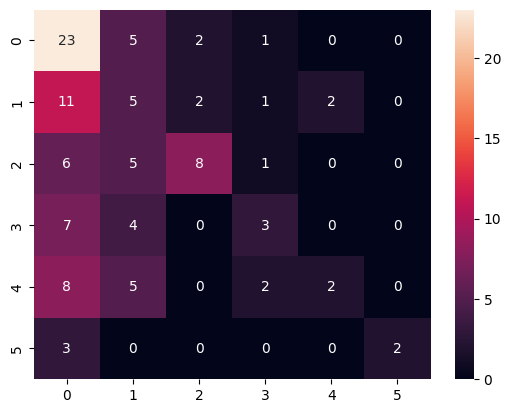

In [35]:
sns.heatmap(confusion_mat, annot=True)